In [10]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [9]:
img = cv2.imread('./sunset-5163192_960_720.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(np.transpose(hist))


[[1.000e+00 1.400e+01 5.600e+01 1.930e+02 6.340e+02 1.413e+03 2.266e+03
  2.679e+03 2.843e+03 2.986e+03 3.021e+03 3.298e+03 3.533e+03 3.774e+03
  4.029e+03 4.340e+03 4.559e+03 4.751e+03 5.101e+03 5.323e+03 5.401e+03
  5.489e+03 5.337e+03 5.243e+03 5.221e+03 5.095e+03 4.626e+03 4.510e+03
  4.127e+03 3.796e+03 3.586e+03 3.319e+03 3.113e+03 2.980e+03 2.709e+03
  2.665e+03 2.628e+03 2.585e+03 2.506e+03 2.510e+03 2.403e+03 2.283e+03
  2.193e+03 2.200e+03 2.230e+03 2.110e+03 2.076e+03 2.151e+03 2.099e+03
  2.043e+03 1.951e+03 1.935e+03 1.917e+03 1.986e+03 1.973e+03 1.879e+03
  1.856e+03 1.794e+03 1.906e+03 1.803e+03 1.764e+03 1.744e+03 1.688e+03
  1.647e+03 1.737e+03 1.698e+03 1.688e+03 1.646e+03 1.709e+03 1.594e+03
  1.569e+03 1.619e+03 1.630e+03 1.594e+03 1.489e+03 1.587e+03 1.570e+03
  1.549e+03 1.532e+03 1.564e+03 1.545e+03 1.529e+03 1.411e+03 1.504e+03
  1.433e+03 1.503e+03 1.454e+03 1.379e+03 1.403e+03 1.350e+03 1.444e+03
  1.510e+03 1.341e+03 1.362e+03 1.371e+03 1.393e+03 1.399e+03 1.

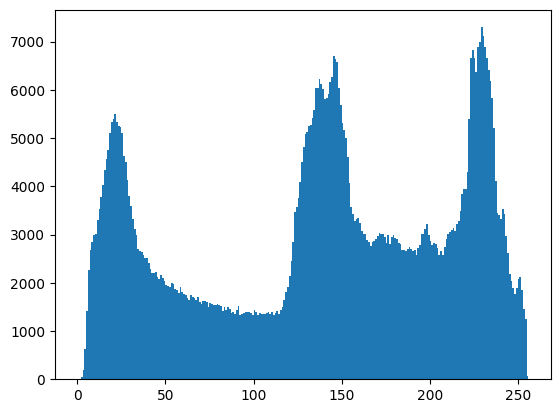

In [11]:
hist = np.bincount(img.ravel(),minlength=256)
plt.hist(img.ravel(),256,[0,256]); plt.show()

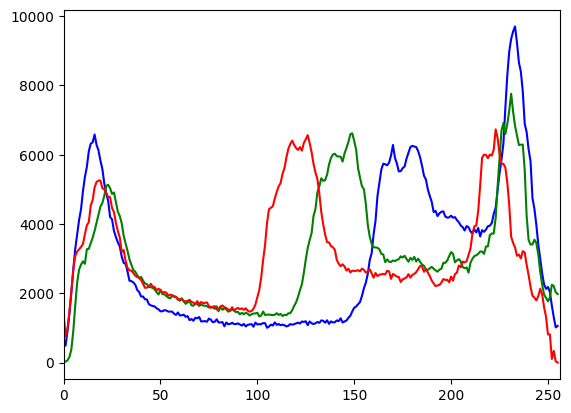

In [12]:
img = cv2.imread('./sunset-5163192_960_720.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


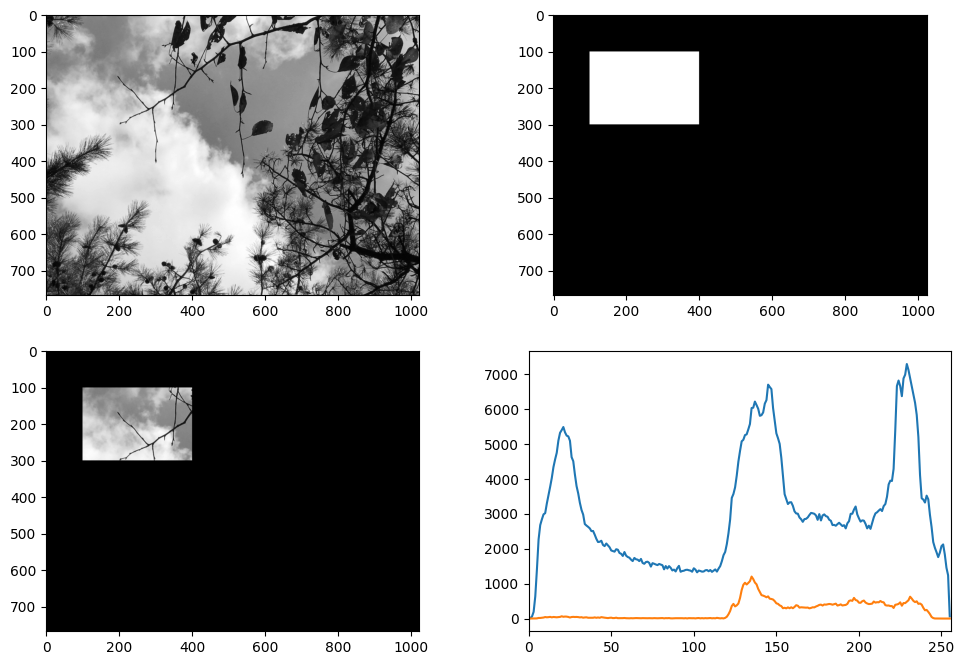

In [13]:
img = cv2.imread('./sunset-5163192_960_720.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


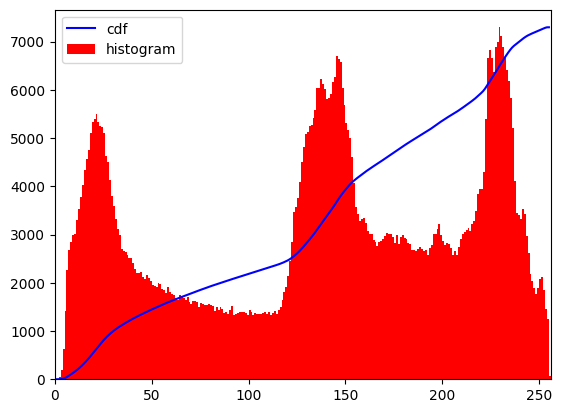

In [26]:

img = cv2.imread('./sunset-5163192_960_720.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


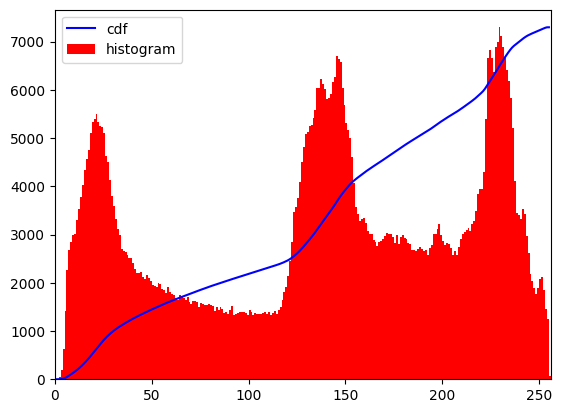

In [27]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


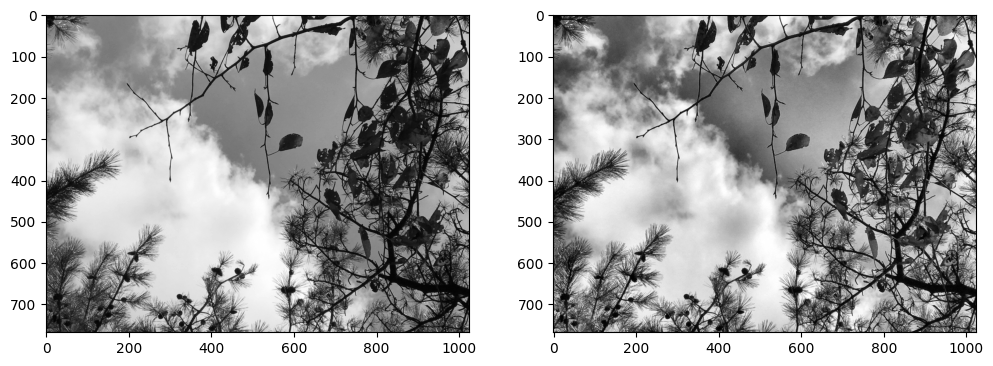

In [32]:
img = cv2.imread('./sunset-5163192_960_720.jpg',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(cl1, 'gray')
plt.show()